In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Распределение Лапласа

Распределение Лапласа (двойное экспоненциальное) — в теории вероятностей это непрерывное распределение случайной величины, при котором плотность вероятности есть

$\displaystyle f(x)={\dfrac {1}{2\beta}}\,e^{-\dfrac {|x-\mu|}{\beta}},\quad -\infty <x<+\infty$,

где $\displaystyle \beta >0$ — параметр масштаба, $\displaystyle -\infty<\mu<+\infty$ — параметр сдвига.

Распределение применяется для моделирования обработки сигналов, в моделировании биологических процессов (когда другие распределения совсем не подогнать), экономике и финансах. Распределение можно применить к: кредитным рискам, страховым случаям, при работе с фильтром Кальмана.

Математическое ожидание: $\mu$,

Дисперсия: $2*\beta^2$

Подробнее: https://www.wolframalpha.com/input/?i=laplace+distribution

Сгенерируем выборку объёма 1000 из распределения Лапласа (с $\mu=1$ и $\beta=0.5$):

In [3]:
mu = 1
beta = 0.5
laplace_rv = sts.laplace(loc=mu, scale=beta)

sample = laplace_rv.rvs(1000, random_state=777)

Постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

Text(0.5,0,'$x$')

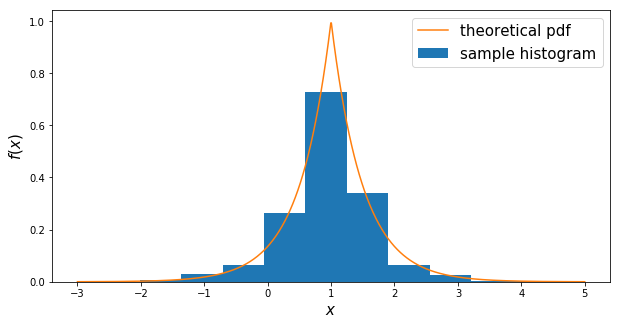

In [4]:
plt.figure(figsize=(10,5))
plt.hist(sample, normed=True, label='sample histogram')

x = np.linspace(-3, 5,1000)
pdf = laplace_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf')

plt.legend(fontsize=15)
plt.ylabel('$f(x)$', fontsize=15)
plt.xlabel('$x$', fontsize=15)

Для распределения математическое ожидание: $\beta$, дисперсия: $2*\alpha^2$, где $\beta=1$, $\alpha=1$.

Соответственно, $p = N(EX, \dfrac{DX}{n}) = N(1, \sqrt{\dfrac{2*\alpha^2}{n}})$

Для выборок размера 5, 10, 50 нарисуем гистограммы средних по выборкам и графики плотности.

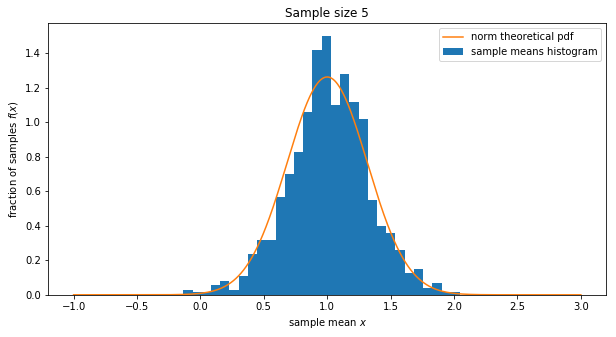

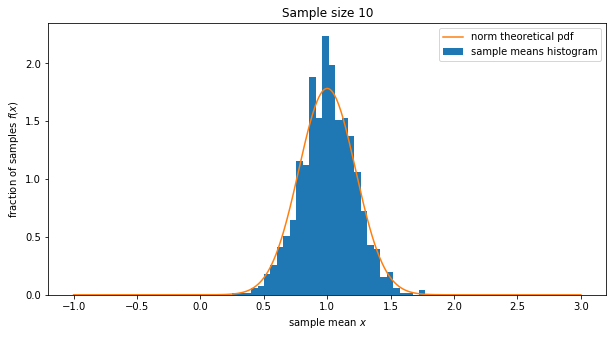

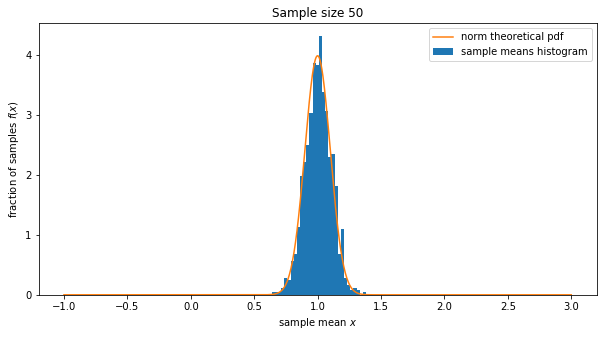

In [5]:
for n in [5, 10, 50]:
    sample_means = []
    for rvn in range(1000):
        sample_means.append(laplace_rv.rvs(size=n).mean())
    plt.figure(figsize=(10,5))
    plt.hist(sample_means, 30, normed=True, label='sample means histogram')
    norm_rv = sts.norm(mu, (np.sqrt(2*beta**2/n)))
    x = np.linspace(-1, 3, 1000)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='norm theoretical pdf')
    plt.legend()
    plt.title("Sample size %d" % n)
    plt.ylabel('fraction of samples $f(x)$')
    plt.xlabel('sample mean $x$')
    plt.show()

Все параметры нормального распределения посчитаны в формуле, так как функция указана явно.

При увеличении размера выборки $n$, распределение средних значений начинает сходиться к среднему значению ($\mu=1$), среднеквадратичное отклонение падает. Т.е. при увеличении $n$ точность апроксимации растет.

При этом расчетное нормальное распределение все больше и больше совпадает с гистограммой, согласно закону больших чисел.